Descript Audio Codec (.dac): High-Fidelity Audio Compression with Improved RVQGAN

In [1]:
import dac
from audiotools import AudioSignal

# Download a model
model_path = dac.utils.download(model_type="44khz")

model = dac.DAC.load(model_path, device = "cuda")


/home/lekhab/.conda/envs/codec_fake/lib/python3.12/site-packages/audiotools/ml/layers/base.py:172: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = torch.load(loca

In [3]:
import os


current_dir = os.getcwd()

# Load audio signal file
file_path = os.path.join(current_dir, "sample_9.wav")
signal = AudioSignal(file_path)

# Encode audio signal as one long file
# (may run out of GPU memory on long files)
signal.to(model.device)

x = model.preprocess(signal.audio_data, signal.sample_rate)
z, codes, latents, _, _ = model.encode(x)

In [16]:
type(z)

torch.Tensor

In [12]:
print("Shape of Codes: ",codes.shape)
print("Shape of z: ", z.shape)
print("Shape of latent: ", latents.shape)

Shape of Codes:  torch.Size([1, 9, 862])
Shape of z:  torch.Size([1, 1024, 862])
Shape of latent:  torch.Size([1, 72, 862])


In [ ]:
# Decode audio signal
y = model.decode(z)

# Alternatively, use the `compress` and `decompress` functions
# to compress long files.

signal = signal.cpu()
x = model.compress(signal)

# # Save and load to and from disk
x.save("compressed.dac")
x = dac.DACFile.load("compressed.dac")

# Decompress it back to an AudioSignal
y = model.decompress(x)

# Write to file
y.write('output.wav')

In [15]:
# Decompress it back to an AudioSignal
y = model.decompress(x)

# Write to file
y.write('output.wav')

In [8]:
import dac
from audiotools import AudioSignal
import os

# Download a model
model_path = dac.utils.download(model_type="44khz")

model = dac.DAC.load(model_path, device = "cuda")

current_dir = os.getcwd()

# Load audio signal file
file_path = os.path.join(current_dir, "sample_9.wav")
signal = AudioSignal(file_path)

# Encode audio signal as one long file
# (may run out of GPU memory on long files)
signal.to(model.device)

x = model.preprocess(signal.audio_data, signal.sample_rate)
z, codes, latents, _, _ = model.encode(x)

# Decode audio signal
y = model.decode(z)

# Alternatively, use the `compress` and `decompress` functions
# to compress long files.

signal = signal.cpu()
x = model.compress(signal)

# Save and load to and from disk
x.save("compressed.dac")
x = dac.DACFile.load("compressed.dac")

# Decompress it back to an AudioSignal
y = model.decompress(x)

#Write to file
y.write('output.wav')

/home/lekhab/.conda/envs/codec_fake/lib/python3.12/site-packages/audiotools/ml/layers/base.py:172: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = torch.load(loca

In [8]:
latents.shape

torch.Size([1, 72, 862])

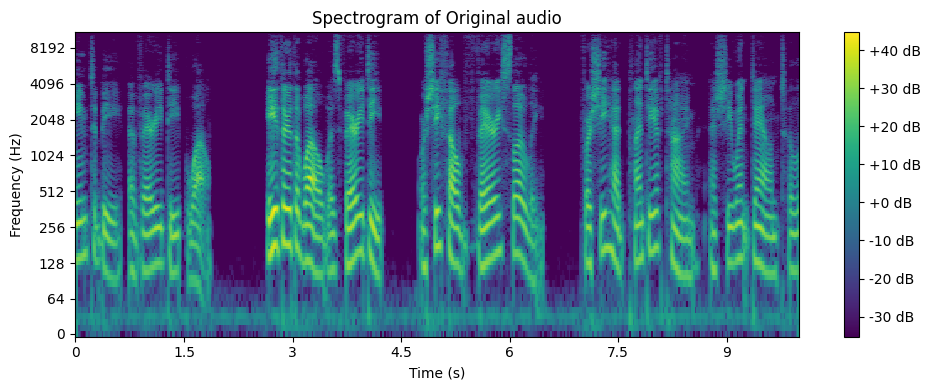

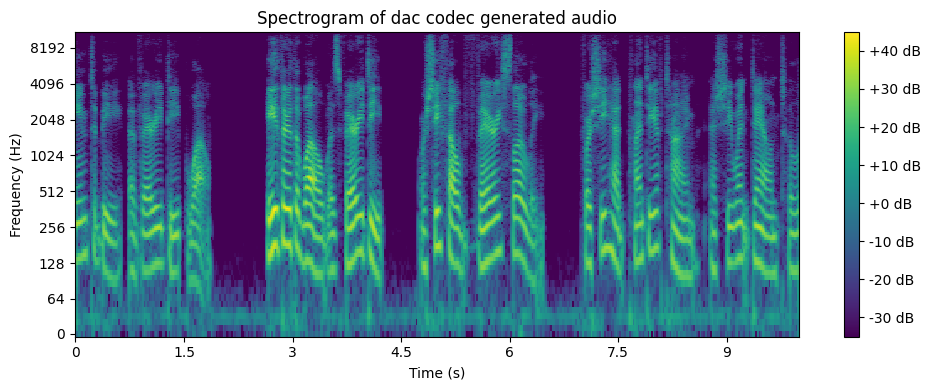

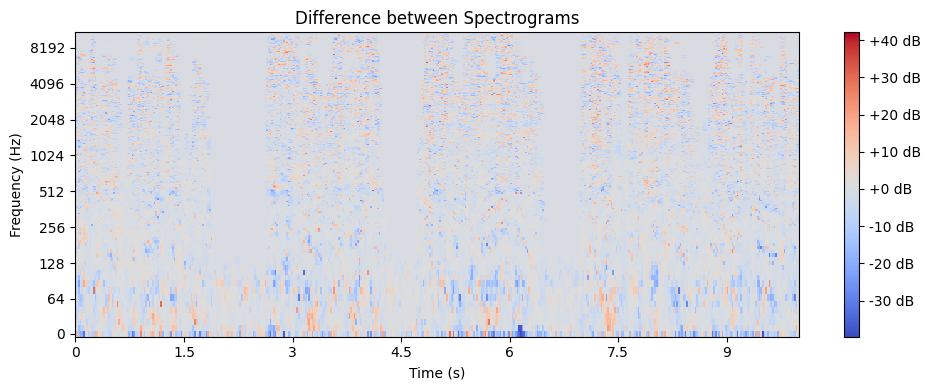

In [10]:
#Create spectograms for input and output audio files

import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_spectrogram(audio_file, title):
    # Load the audio file
    y, sr = librosa.load(audio_file)
    
    # Compute the STFT and convert to decibel scale
    stft = librosa.stft(y)
    spectrogram = librosa.amplitude_to_db(abs(stft))
    
    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()



def plot_spectrogram_difference(audio_file1, audio_file2):
    # Load and compute spectrograms for both audio files
    y1, sr1 = librosa.load(audio_file1)
    y2, sr2 = librosa.load(audio_file2)
    
    if sr1 != sr2:
        raise ValueError("Sample rates of the two audio files do not match. Please resample to the same rate.")
    
    # Compute the STFT for both signals
    stft1 = librosa.stft(y1)
    stft2 = librosa.stft(y2)
    
    # Convert to decibel scale
    spectrogram1 = librosa.amplitude_to_db(abs(stft1))
    spectrogram2 = librosa.amplitude_to_db(abs(stft2))
    
    # Compute the difference between the two spectrograms
    spectrogram_diff = spectrogram1 - spectrogram2
    
    # Plot the difference
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_diff, sr=sr1, x_axis='time', y_axis='log', cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Difference between Spectrograms")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()
# File paths for the two audio files
audio_file1 = 'sample_9.wav'  # original audio
audio_file2 = 'output.wav'  # output audio file from dac

# Plot spectrograms for both files
plot_spectrogram(audio_file1, title="Spectrogram of Original audio")
plot_spectrogram(audio_file2, title="Spectrogram of dac codec generated audio")
plot_spectrogram_difference(audio_file1, audio_file2)



In [2]:
#to check if torch has cuda

import torch
print(torch.cuda.is_available())
print(torch.version.cuda)


True
11.8


In [4]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.
